In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from jupyterthemes import jtplot
import matplotlib.ticker as tick
import warnings
import modin.pandas as pd

warnings.filterwarnings("ignore")

rcdict = {
    
    'grid.linewidth': 1,
    'xtick.major.size': 0,
    'ytick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.minor.size': 0 
    
}

sns.set(font_scale=2, style='white')


COLOR_P = [
    
    '#4078c0',
    '#6cc644',
    '#bd2c00',
    '#c9510c',
    '#6e5494'
    
]

root = '../mph/output'
data = pd.read_csv(os.path.join(root, '83nm_ka0.5_far.txt'), comment='%', header=None)
data.rename(columns={0 : 'theta', 1 : 'r'}, inplace=True)

data2 = pd.read_csv(os.path.join(root, '830nm_ka0.5_far.txt'), comment='%', header=None)
data2.rename(columns={0 : 'theta', 1 : 'r'}, inplace=True)

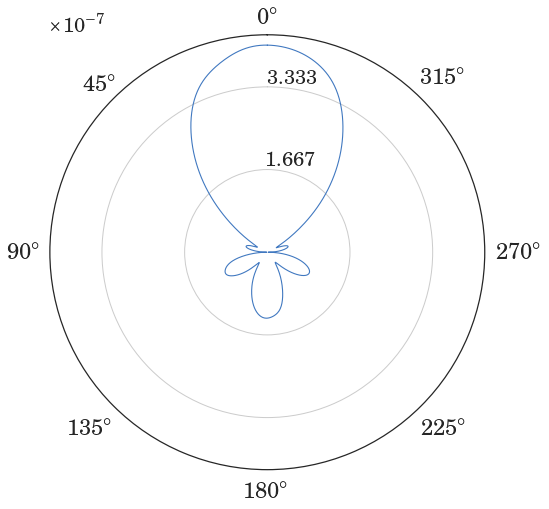

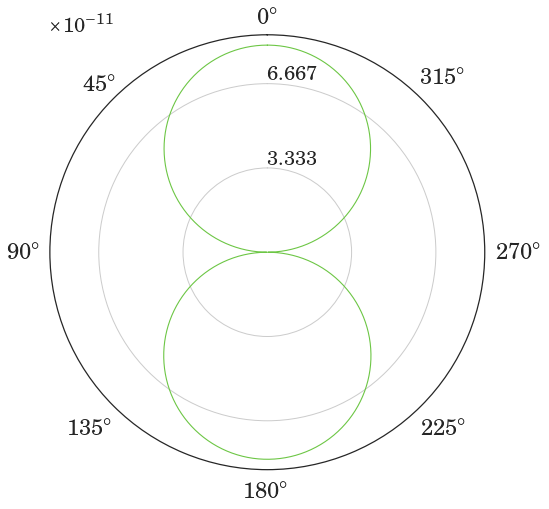

In [35]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r"\usepackage{fouriernc}")

mpl.rcParams.update({
  "mathtext.fontset" : "custom",
  "font.weight" : "light",
  "font.serif" : "New Century Schoolbook",
  "font.family" : "New Century Schoolbook",
  "font.cursive" : "New Century Schoolbook",
  "mathtext.rm" : "New Century Schoolbook",
  "mathtext.it" : "New Century Schoolbook:italic",
  "mathtext.bf" : "New Century Schoolbook",
})


fig, ax = plt.subplots(figsize=(16, 8), subplot_kw={'projection': 'polar'})
fig2, ax2 = plt.subplots(figsize=(16, 8), subplot_kw={'projection': 'polar'})

for a in (ax, ax2):
    a.set_rlabel_position(0)
    a.set_xticklabels([r'$0^{\circ}$', r'$45^{\circ}$', r'$90^{\circ}$',
                           r'$135^{\circ}$'] + [r'$180^{\circ}$', r'$225^{\circ}$',
                           r'$270^{\circ}$', r'$315^{\circ}$'])
    a.set_theta_zero_location('N')
    a.set_theta_direction(1)
    a.tick_params(axis='x', which='major', pad=10)

sns.lineplot(
    x=data.theta.to_numpy(), 
    y=data.r.to_numpy(), 
    linestyle='solid', 
    color=COLOR_P[0], 
    ax=ax,
    label=r'$\lambda = \lambda_{10}$',
    legend=0,
    linewidth=1.1
)

sns.lineplot(
    x=data2.theta.to_numpy(), 
    y=data2.r.to_numpy(), 
    linestyle='solid', 
    color=COLOR_P[1], 
    ax=ax2,
    label=r'$\lambda = \lambda_{L}$',
    legend=0,
    linewidth=1.1
)

ax.set_rticks([i for i in np.linspace(0, 5e-7, 4)[1:-1]])
ax2.set_rticks([i for i in np.linspace(0, 1.e-10, 4)[1:-1]])

ax.grid(axis='x')
ax2.grid(axis='x')


# w1 = ax.annotate(r'$\rm{(a)}$',
#             xy=(0, 0),
#             xytext=(0.02, 0.5),
#             textcoords='figure fraction'
# )
# w2 = ax2.annotate(r'$\rm{(b)}$',
#             xy=(0.5, 0),
#             xytext=(0.5, 0.5),
#             textcoords='figure fraction'
# )

artst = [[], []]

for j, aa in enumerate((ax, ax2)):
    for i, (g, t) in enumerate(zip(np.linspace(0, 315, 8), aa.get_xticklabels())):
        
        x, y = t.get_position()
        ha, va = t.get_ha(), t.get_va()

        
        hava = {

            0 : 0.09,
            45 : 0.08,
            90 : 0.05,
            135 : 0.027,
            180 : 0.07,
            225 : 0.0242,
            270 : 0.012,
            315 : 0.03

        }

        if g in hava.keys():
            y = hava.get(g)

        lab = aa.text(x, y, t.get_text(), transform=t.get_transform(),
                    ha=ha, va=va)
        artst[j].append(lab)

    aa.set_xticklabels([])
    aa.xaxis.set_tick_params(pad=24)

fig.savefig('../components/img/mph/ka0.5_far_field_83.pdf', bbox_inches='tight', bbox_extra_artists=artst[0])
fig2.savefig('../components/img/mph/ka0.5_far_field_830.pdf', bbox_inches='tight', bbox_extra_artists=artst[1])
